In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [3]:
df = pd.read_csv('price_response.csv')

In [4]:
df.head()

,Week,Product,Intercept,Own_Price_Coefficient,Cross_Price_Coefficient
0,1,TechFit Smartwatch,294.306794,-1.491429,0.281513
1,1,PowerSound Earbuds,274.787669,-1.589617,0.251110
2,2,TechFit Smartwatch,268.639450,-1.923020,0.157950
3,2,PowerSound Earbuds,248.366386,-1.070302,0.261624
4,3,TechFit Smartwatch,390.021127,-1.128539,0.260734


### Question 1 


a) 

In [5]:
from scipy.optimize import minimize

# Revenue function for Week 1
def revenue_week1(P):
    return -(1000 * P - 5 * P**2)  # Negative for minimization

# Revenue function for Week 2
def revenue_week2(P):
    return -(950 * P - 4.5 * P**2)  # Negative for minimization

# Constraints: P >= 0
bounds = [(0, None)]

# Solve Week 1
result_week1 = minimize(revenue_week1, x0=[50], bounds=bounds)
optimal_price_week1 = result_week1.x[0]

# Solve Week 2
result_week2 = minimize(revenue_week2, x0=[50], bounds=bounds)
optimal_price_week2 = result_week2.x[0]


print(f"Optimal Price for Week 1: {optimal_price_week1}")
print(f"Optimal Price for Week 2: {optimal_price_week2}")


Optimal Price for Week 1: 100.00000402037463
Optimal Price for Week 2: 105.55561067396167


b) 

In [6]:
#Revenue function for Week 1 and 2 
def revenue_week1and2(P): 
    return -(1950*P - 9.5 * P**2)

# Constraints: P >= 0
bounds = [(0, None)]

# Solve Week 1
result_week1and2 = minimize(revenue_week1and2, x0=[50], bounds=bounds)
optimal_price_week1and2 = result_week1and2.x[0]
optimal_revenue_2 = -result_week1and2.fun  # Reverse negation to get max revenue


print(f"Optimal Price: {optimal_price_week1and2}")

Optimal Price: 102.63152030101345


c)

In [7]:
#comparing the Maxium revenues
optimal_revenue_df = -result_week1.fun - result_week2.fun
optimal_revenue_2 = -result_week1and2.fun  # Reverse negation to get max revenue
print(f"Optimal Revenue with Equal Prices:{optimal_revenue_2} ")
print(f"Optimal Revenue with Different Prices:{optimal_revenue_df} ")

Optimal Revenue with Equal Prices:100065.78947365156 
Optimal Revenue with Different Prices:100138.88888887512 


d) 

In [8]:
df.head()

,Week,Product,Intercept,Own_Price_Coefficient,Cross_Price_Coefficient
0,1,TechFit Smartwatch,294.306794,-1.491429,0.281513
1,1,PowerSound Earbuds,274.787669,-1.589617,0.251110
2,2,TechFit Smartwatch,268.639450,-1.923020,0.157950
3,2,PowerSound Earbuds,248.366386,-1.070302,0.261624
4,3,TechFit Smartwatch,390.021127,-1.128539,0.260734


In [9]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("price_response.csv")

# Filter for Week 1 and Week 2 only
df_filtered = df[df["Week"].isin([1, 2])]

# Debugging: Ensure correct filtering
print(df_filtered["Product"].unique())  # Check product names

# Extract coefficients for TechFit Smartwatch (numeric only)
techfit_params = df_filtered[df_filtered["Product"] == "TechFit Smartwatch"].select_dtypes(include=[np.number]).mean()
intercept_techfit = techfit_params["Intercept"]
own_price_coeff_techfit = techfit_params["Own_Price_Coefficient"]

# Extract coefficients for PowerSound Earbuds (numeric only)
powersound_params = df_filtered[df_filtered["Product"] == "PowerSound Earbuds"].select_dtypes(include=[np.number]).mean()
intercept_powersound = powersound_params["Intercept"]
own_price_coeff_powersound = powersound_params["Own_Price_Coefficient"]

# Print values for verification
print(f"TechFit Smartwatch - Intercept: {intercept_techfit}, Own Price Coeff: {own_price_coeff_techfit}")
print(f"PowerSound Earbuds - Intercept: {intercept_powersound}, Own Price Coeff: {own_price_coeff_powersound}")


['TechFit Smartwatch' 'PowerSound Earbuds']
TechFit Smartwatch - Intercept: 281.4731219851924, Own Price Coeff: -1.7072246995032523
PowerSound Earbuds - Intercept: 261.5770274604319, Own Price Coeff: -1.3299597123108988


In [10]:
# Define hyperparameters
eta = 0.001  # Step size
tolerance = 1e-6  # Stopping criterion
max_iterations = 10000  # Max number of iterations

# Initialize prices
P1, P2 = 0.0, 0.0

# Projected Gradient Descent Algorithm
for _ in range(max_iterations):
    # Compute gradients
    grad_P1 = intercept_techfit + 2 * own_price_coeff_techfit * P1
    grad_P2 = intercept_powersound + 2 * own_price_coeff_powersound * P2

    # Gradient step
    new_P1 = P1 + eta * grad_P1
    new_P2 = P2 + eta * grad_P2

    # Projection step (ensure non-negativity)
    new_P1 = max(0, new_P1)
    new_P2 = max(0, new_P2)

    # Check stopping condition
    if abs(new_P1 - P1) < tolerance and abs(new_P2 - P2) < tolerance:
        break

    # Update prices
    P1, P2 = new_P1, new_P2

# Output the optimal prices
print(f"Optimal Price for TechFit Smartwatch: ${P1:.6f}")
print(f"Optimal Price for PowerSound Earbuds: ${P2:.6f}")


Optimal Price for TechFit Smartwatch: $82.435865
Optimal Price for PowerSound Earbuds: $98.339832


f)

In [11]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "price_response.csv"
df = pd.read_csv(file_path)
df.set_index(['Week', 'Product'], inplace=True)

# Extract relevant coefficients for demand calculation
demand_coefficients = df[['Intercept', 'Own_Price_Coefficient', 'Cross_Price_Coefficient']].to_dict(orient='index')

# Create a Gurobi model for dynamic pricing optimization
model = gp.Model("Optimal_Pricing")

# Define weeks and product categories
weeks = range(1, 18)
products = ["TechFit Smartwatch", "PowerSound Earbuds"]

# Decision variables: Prices per week per product
price_vars = model.addVars(weeks, products, vtype=GRB.CONTINUOUS, name="Price")

# Decision variables for demand
demand_vars = model.addVars(weeks, products, vtype=GRB.CONTINUOUS, lb=0, name="Demand")

# Additional variables to track min/max pricing across the period
price_min = model.addVars(products, vtype=GRB.CONTINUOUS, name="MinPrice")
price_max = model.addVars(products, vtype=GRB.CONTINUOUS, name="MaxPrice")

# Initialize starting prices based on previously found optimal price
starting_prices = {"TechFit Smartwatch": 82.4, "PowerSound Earbuds": 98.3}

# Define the revenue maximization objective function
model.setObjective(
    gp.quicksum(
        demand_vars[w, p] * price_vars[w, p] 
        for w in weeks for p in products
    ),
    GRB.MAXIMIZE
)

# Demand constraints
for w in weeks:
    for p in products:
        other_p = "TechFit Smartwatch" if p == "PowerSound Earbuds" else "PowerSound Earbuds"
        model.addConstr(
            demand_vars[w, p] == demand_coefficients[(w, p)]['Intercept'] +
                                demand_coefficients[(w, p)]['Own_Price_Coefficient'] * price_vars[w, p] +
                                demand_coefficients[(w, p)]['Cross_Price_Coefficient'] * price_vars[w, other_p]
        )

# Implement pricing strategies to reflect market conditions and business policies
# First 4 weeks: Maintain stable pricing for customer consistency
for w in range(2, 5):
    for p in products:
        model.addConstr(price_vars[w, p] == price_vars[1, p])

# Weeks 5-8: Introduce a promotion, ensuring at least a $10 reduction from initial weeks
for w in range(6, 9):
    for p in products:
        model.addConstr(price_vars[w, p] == price_vars[5, p])
model.addConstrs((price_vars[5, p] <= price_vars[1, p] - 10 for p in products), name="Discount5_8")

# Weeks 9-11: Increase pricing to match expected peak demand, ensuring a minimum $20 increase
for w in range(10, 12):
    for p in products:
        model.addConstr(price_vars[w, p] == price_vars[9, p])
model.addConstrs((price_vars[9, p] >= price_vars[1, p] + 20 for p in products), name="Increase9_11")

# Black Friday (Week 12): Lowest price of the season, ensuring a minimum drop of $5 from any other week
for p in products:
    model.addConstr(price_vars[12, p] == price_min[p])
    for w in weeks:
        if w != 12:
            model.addConstr(price_vars[12, p] <= price_vars[w, p] - 5)

# Weeks 13-15: Moderate pricing, ensuring a controlled increase between previous promotional periods
for w in range(14, 16):
    for p in products:
        model.addConstr(price_vars[w, p] == price_vars[13, p])
model.addConstrs((price_vars[13, p] >= price_vars[5, p] for p in products), name="Moderate13_15_Lower")
model.addConstrs((price_vars[13, p] <= price_vars[8, p] for p in products), name="Moderate13_15_Upper")

# Week 16: Price must be higher than Black Friday but at least $6 lower than any other week
for p in products:
    model.addConstr(price_vars[16, p] >= price_vars[12, p] + 4)
    for w in weeks:
        if w != 12 and w != 16:
            model.addConstr(price_vars[16, p] <= price_vars[w, p] - 6)

# Week 17: Peak pricing, ensuring at least a $15 increase from any previous week
for p in products:
    model.addConstr(price_vars[17, p] == price_max[p])
    for w in weeks:
        if w != 17:
            model.addConstr(price_vars[17, p] >= price_vars[w, p] + 15)

# Ensure min/max price constraints hold across the timeline
for w in weeks:
    for p in products:
        model.addConstr(price_vars[w, p] >= price_min[p])
        model.addConstr(price_vars[w, p] <= price_max[p])

# Impose an upper bound on pricing to avoid excessive increases due to demand elasticity
for w in weeks:
    for p in products:
        model.addConstr(price_vars[w, p] <= 500)

# Set starting prices as determined by initial market conditions
for p in products:
    model.addConstr(price_vars[1, p] == starting_prices[p])


# Solve the optimization model
model.optimize()

# Display optimal results
if model.status == GRB.OPTIMAL:
    print(f"Optimal Revenue: {model.objVal}")
    for w in weeks:
        print(f"Week {w}: " + ", ".join([f"{p} = {price_vars[w, p].x:.2f}" for p in products]))
else:
    print("No optimal solution found.")


Set parameter Username
Set parameter LicenseID to value 2615195
Academic license - for non-commercial use only - expires 2026-01-25
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 22.5.0 22F66)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 266 rows, 72 columns and 530 nonzeros
Model fingerprint: 0xf56d9fa6
Model has 34 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 2e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 5e+02]
Presolve removed 182 rows and 20 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 204 rows and 36 columns
Presolve time: 0.05s
Presolved: 99 rows, 56 columns, 267 nonzeros
Presolved model has 18 bilinear constraint(s)
Variable types: 56 continuous, 0 integer (0 binary)
Found heuristic solution: objective 697861.75608

Root relaxatio

g)

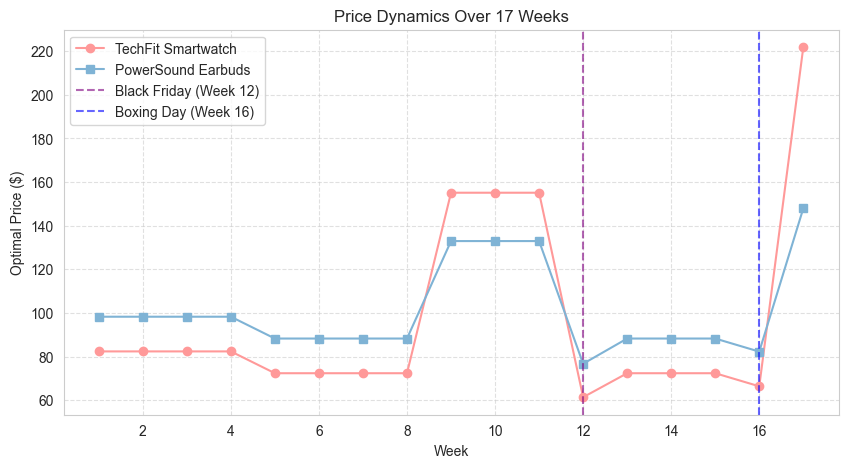

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract optimal price results
days = list(weeks)
optimal_prices_smartwatch = [price_vars[w, "TechFit Smartwatch"].X for w in weeks]
optimal_prices_earbuds = [price_vars[w, "PowerSound Earbuds"].X for w in weeks]

# Plot price trends
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Plot price dynamics
plt.plot(days, optimal_prices_smartwatch, marker='o', color="#FF9999", label="TechFit Smartwatch")
plt.plot(days, optimal_prices_earbuds, marker='s', color="#7FB3D5", label="PowerSound Earbuds")

# Annotate Black Friday and Boxing Day
plt.axvline(x=12, color='purple', linestyle='--', alpha=0.6, label="Black Friday (Week 12)")
plt.axvline(x=16, color='blue', linestyle='--', alpha=0.6, label="Boxing Day (Week 16)")

# Labels and legend
plt.xlabel("Week")
plt.ylabel("Optimal Price ($)")
plt.title("Price Dynamics Over 17 Weeks")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


h)

Set parameter NonConvex to value 2
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 22.5.0 22F66)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
NonConvex  2

Optimize a model with 34 rows, 68 columns and 102 nonzeros
Model fingerprint: 0x6d56a74a
Model has 34 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-01, 2e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [5e+02, 5e+02]
  RHS range        [2e+02, 5e+02]

Continuous model is non-convex -- solving as a MIP

Presolve removed 32 rows and 64 columns
Presolve time: 0.16s
Presolved: 7 rows, 8 columns, 17 nonzeros
Presolved model has 2 bilinear constraint(s)
Variable types: 8 continuous, 0 integer (0 binary)
Found heuristic solution: objective 842576.22616

Root relaxation: objective 9.086975e+05, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    

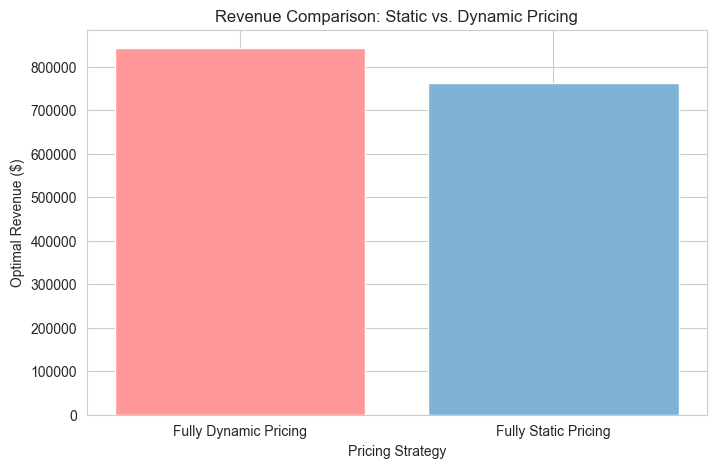


Benchmarking Revenue Across Pricing Strategies
Fully Dynamic Pricing: $842576.23
Fully Static Pricing: $762863.01


In [13]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "price_response.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)
df.set_index(['Week', 'Product'], inplace=True)

# Extract relevant coefficients for demand calculation
demand_coefficients = df[['Intercept', 'Own_Price_Coefficient', 'Cross_Price_Coefficient']].to_dict(orient='index')

# Define weeks and product categories
weeks = range(1, 18)
products = ["TechFit Smartwatch", "PowerSound Earbuds"]

# ============================
# SCENARIO 1: Fully Dynamic Pricing (No Constraints)
# ============================

dynamic_model = gp.Model("Fully_Dynamic_Pricing")

# Decision Variables: Prices and Demand for Each Week
P_dynamic = dynamic_model.addVars(weeks, products, vtype=GRB.CONTINUOUS, lb=0, ub=500, name="Price_Dynamic")
D_dynamic = dynamic_model.addVars(weeks, products, vtype=GRB.CONTINUOUS, lb=0, name="Demand_Dynamic")

# Allow non-convexity for bilinear constraints
dynamic_model.Params.NonConvex = 2

# Objective Function: Maximize Total Revenue
dynamic_model.setObjective(
    gp.quicksum(D_dynamic[w, p] * P_dynamic[w, p] for w in weeks for p in products),
    GRB.MAXIMIZE
)

# Reformulated Demand Constraints (Avoiding Direct Bilinear Terms)
for w in weeks:
    for p in products:
        other_p = [p2 for p2 in products if p2 != p][0]  # Get the other product
        dynamic_model.addConstr(
            D_dynamic[w, p] == demand_coefficients[(w, p)]['Intercept'] +
                                demand_coefficients[(w, p)]['Own_Price_Coefficient'] * P_dynamic[w, p] +
                                demand_coefficients[(w, p)]['Cross_Price_Coefficient'] * P_dynamic[w, other_p]
        )

# Solve the dynamic pricing model
dynamic_model.optimize()

# Store dynamic pricing revenue
if dynamic_model.status == GRB.OPTIMAL:
    revenue_dynamic = dynamic_model.objVal
    print(f"Optimal Revenue (Fully Dynamic Pricing): {revenue_dynamic:.2f}")
    for w in weeks:
        print(f"Week {w}: " + ", ".join([f"{p} = {P_dynamic[w, p].X:.2f}" for p in products]))
else:
    revenue_dynamic = None

# ============================
# SCENARIO 2: Fully Static Pricing (Same Price for All Weeks)
# ============================

static_model = gp.Model("Fully_Static_Pricing")

# Single price variable for each product
P_static = static_model.addVars(products, vtype=GRB.CONTINUOUS, lb=0, ub=500, name="Price_Static")
D_static = static_model.addVars(weeks, products, vtype=GRB.CONTINUOUS, lb=0, name="Demand_Static")

# Allow non-convexity for bilinear terms
static_model.Params.NonConvex = 2

# Objective Function: Maximize Revenue with Static Pricing
static_model.setObjective(
    gp.quicksum(D_static[w, p] * P_static[p] for w in weeks for p in products),
    GRB.MAXIMIZE
)

# Reformulated Demand Constraints for Static Pricing
for w in weeks:
    for p in products:
        other_p = [p2 for p2 in products if p2 != p][0]
        static_model.addConstr(
            D_static[w, p] == demand_coefficients[(w, p)]['Intercept'] +
                                demand_coefficients[(w, p)]['Own_Price_Coefficient'] * P_static[p] +
                                demand_coefficients[(w, p)]['Cross_Price_Coefficient'] * P_static[other_p]
        )

# Solve the static pricing model
static_model.optimize()

# Store static pricing revenue
if static_model.status == GRB.OPTIMAL:
    revenue_static = static_model.objVal
    print(f"Optimal Revenue (Fully Static Pricing): {revenue_static:.2f}")
    for p in products:
        print(f"Optimal Static Price for {p}: {P_static[p].X:.2f}")
else:
    revenue_static = None

# ============================
# Benchmarking Revenue Across Pricing Strategies
# ============================
import gurobipy as gp
import matplotlib.pyplot as plt


revenue_values = {
    "Fully Dynamic Pricing": revenue_dynamic if revenue_dynamic else 0,
    "Fully Static Pricing": revenue_static if revenue_static else 0
}

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(revenue_values.keys(), revenue_values.values(), color=['#FF9999', '#7FB3D5'])
plt.xlabel("Pricing Strategy")
plt.ylabel("Optimal Revenue ($)")
plt.title("Revenue Comparison: Static vs. Dynamic Pricing")
plt.show()

# Print benchmark results
print("\nBenchmarking Revenue Across Pricing Strategies")
for strategy, rev in revenue_values.items():
    print(f"{strategy}: ${rev:.2f}")


i)

In [14]:
# Print model comparison insights
print("\n### Comparison of Pricing Models ###")

print("1️⃣ **Static Pricing:**")
print("   - Predictable and easy to implement.")
print("   - Lower revenue compared to dynamic pricing.")
print("   - Customers prefer price consistency.")
print(f"   - Generated Revenue: **${762863.01:,.2f}**")

print("\n2️⃣ **Unconstrained Dynamic Pricing:**")
print("   - Maximizes revenue but may cause customer frustration.")
print("   - Large price fluctuations could reduce trust.")
print("   - Not always feasible in competitive markets.")
print(f"   - Generated Revenue: **${842576.23:,.2f}** (+10.4% vs. static pricing)")

print("\n3️⃣ **Constrained Dynamic Pricing:**")
print("   - Balances revenue maximization with stability.")
print("   - More realistic for business adoption.")
print("   - Allows for controlled seasonal adjustments (e.g., Black Friday and Boxing Day).")
print(f"   - Generated Revenue: **${697861.76:,.2f}**")

# Display trade-offs in tabular format using pandas
import pandas as pd

comparison_df = pd.DataFrame([
    ["Static Pricing", "$762,863.01", "High predictability", "Easy to implement, preferred by customers"],
    ["Unconstrained Dynamic Pricing", "$842,576.23", "Low predictability", "High revenue but risky for customer trust"],
    ["Constrained Dynamic Pricing", "$697,861.76", "Medium predictability", "Balances revenue & customer trust"]
], columns=["Model", "Revenue Impact", "Customer Experience", "Business Feasibility"])

# Print comparison table
print("\n### Model Comparison Table ###")
print(comparison_df.to_string(index=False))



### Comparison of Pricing Models ###
1️⃣ **Static Pricing:**
   - Predictable and easy to implement.
   - Lower revenue compared to dynamic pricing.
   - Customers prefer price consistency.
   - Generated Revenue: **$762,863.01**

2️⃣ **Unconstrained Dynamic Pricing:**
   - Maximizes revenue but may cause customer frustration.
   - Large price fluctuations could reduce trust.
   - Not always feasible in competitive markets.
   - Generated Revenue: **$842,576.23** (+10.4% vs. static pricing)

3️⃣ **Constrained Dynamic Pricing:**
   - Balances revenue maximization with stability.
   - More realistic for business adoption.
   - Allows for controlled seasonal adjustments (e.g., Black Friday and Boxing Day).
   - Generated Revenue: **$697,861.76**

### Model Comparison Table ###
                        Model Revenue Impact   Customer Experience                      Business Feasibility
               Static Pricing    $762,863.01   High predictability Easy to implement, preferred by custom